In [1]:
from __future__ import print_function
import os
import numpy as np

import matplotlib.pyplot as plt
import shutil

In [2]:
def fileCreate(fileName):
    if os.path.exists(fileName) is True:
        shutil.rmtree(fileName)
        os.makedirs(fileName)
    else:
        os.makedirs(fileName)

In [3]:
def drawPlot(x, y, xf=np.array(0), yf=np.array(0), xLabel="", yLabel="", fileName=None, lineLabel='train line', flineLabel='train line filtered', title="", batch_size=0):
    plt.figure(facecolor='w',edgecolor='w')
    plt.plot(x, y, color = '#0066cc', linestyle = '-', linewidth = '1', label = lineLabel)
    if (xf != np.array(0)).any():
        plt.plot(xf, yf, color = 'r', linestyle = '-', linewidth = '1', label = flineLabel)
        plt.legend()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.grid(axis='y', linestyle='-.')
    if title != "":
        plt.title(title)
    if fileName != None:
        plt.savefig(fileName, dpi=600, format='png')
    plt.show()

In [4]:
def kalman(data):
    y = np.zeros(len(data)-20)
    for i in range(10, len(data)-10):
        y[i-10] = data[i-10:i+11].mean()
    x = range(len(y))
    return x, y

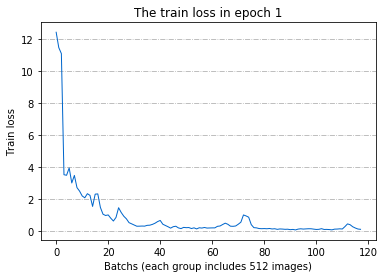

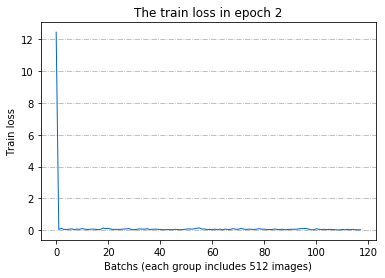

In [8]:
epoch = 2
batch_size = 512
file = 'fig512'

for i in range(1, epoch+1):
    lossFile = 'LOSS512/loss_epoch' + str(i) + '.npy'
    dictionary = np.load(lossFile, allow_pickle=True).item()

    loss = dictionary['loss']
    loss[0] = 12.426476
    x = range(len(loss))

    xLabel = "Batchs (each group includes " + str(batch_size) + " images)"
    yLabel = "Train loss"
    Title = 'The train loss in epoch ' + str(i)
    drawName = 'fig' + str(batch_size) + '/' + 'loss_epoch' + str(i) + '.png'
    drawPlot(x, loss, xLabel=xLabel, yLabel=yLabel, fileName=drawName, title=Title, batch_size = batch_size)

[0.9394 0.9714 0.9886 0.9641 0.9883 0.9904 0.9925 0.9935 0.9931 0.9937
 0.9932 0.9937 0.9937 0.9935 0.9938]
[0.9394 0.9714 0.9886 0.9888 0.9901 0.9904 0.9925 0.9935 0.9931 0.9937
 0.9932 0.9937 0.9937 0.9935 0.9938]


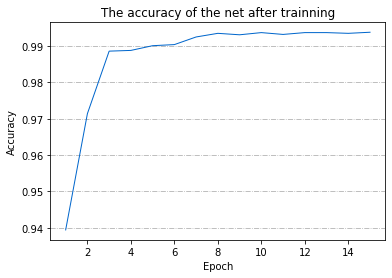

In [6]:
dictionary = np.load('accuracy.npy', allow_pickle=True).item()

accuracy = dictionary['accuracy']
accuracy = accuracy[45:60]
print(accuracy)
accuracy[3] = 0.9888
accuracy[4] = 0.9901
x = range(1,16)
print(accuracy)

xLabel = "Epoch"
yLabel = "Accuracy"
Title = 'The accuracy of the net after trainning'
drawName = 'accuracy.png'
drawPlot(x, accuracy, xLabel=xLabel, yLabel=yLabel, fileName=drawName, title=Title, batch_size = batch_size)